In [30]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
start = dt.datetime(1970,1,1)
end = dt.datetime.today()
stock = 'AMZN'

df = pd.DataFrame()
df[stock] = web.DataReader(stock, 'yahoo', start, end)['Adj Close']
df

,AMZN
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2020-08-25,3346.489990
2020-08-26,3441.850098
2020-08-27,3400.000000


## Simple Moving Averages

In [32]:
sma = [30,60,120]

for ma in sma:
    df['sma ' + str(ma)] = df[stock].rolling(window=ma).mean()
df.dropna(inplace=True)
df

,AMZN,sma 30,sma 60,sma 120
Date,,,,
1997-11-03,5.072917,4.294965,3.496181,2.680946
1997-11-04,4.958333,4.306076,3.540017,2.705946
1997-11-05,4.875000,4.322743,3.584635,2.732161
1997-11-06,4.661458,4.342188,3.625694,2.756771
1997-11-07,4.479167,4.352604,3.664410,2.780469
...,...,...,...,...
2020-08-25,3346.489990,3141.553654,2945.857829,2561.141916
2020-08-26,3441.850098,3155.986320,2962.015165,2573.981584
2020-08-27,3400.000000,3169.322990,2977.375167,2587.309834


## Exponential Moving Averages

In [33]:
ema = [30,60,120]

for ema in ema:
    df['ema ' + str(ema)] = df[stock].ewm(span=ema, adjust=False).mean()

df.dropna(inplace=True)
df

,AMZN,sma 30,sma 60,sma 120,ema 30,ema 60,ema 120
Date,,,,,,,
1997-11-03,5.072917,4.294965,3.496181,2.680946,5.072917,5.072917,5.072917
1997-11-04,4.958333,4.306076,3.540017,2.705946,5.065524,5.069160,5.071023
1997-11-05,4.875000,4.322743,3.584635,2.732161,5.053232,5.062794,5.067783
1997-11-06,4.661458,4.342188,3.625694,2.756771,5.027956,5.049635,5.061066
1997-11-07,4.479167,4.352604,3.664410,2.780469,4.992551,5.030931,5.051448
...,...,...,...,...,...,...,...
2020-08-25,3346.489990,3141.553654,2945.857829,2561.141916,3138.731604,2959.752391,2681.329504
2020-08-26,3441.850098,3155.986320,2962.015165,2573.981584,3158.287636,2975.558873,2693.900093
2020-08-27,3400.000000,3169.322990,2977.375167,2587.309834,3173.881982,2989.474975,2705.571166


Text(0, 0.5, 'Adj Close Price')

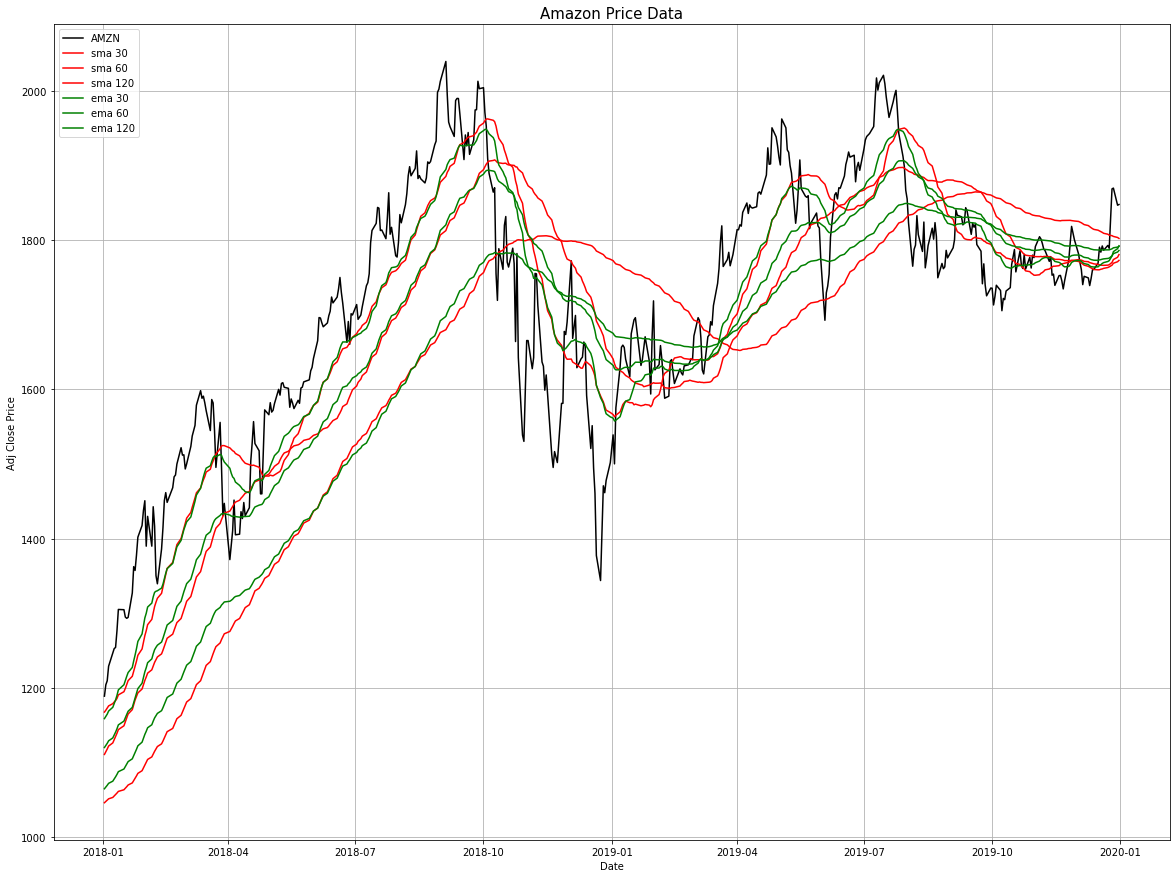

In [35]:
plt.figure(figsize=(20,15))
plt.grid(True)

for column in df.columns:
    if column == 'AMZN':
        plt.plot(df['2018':'2019'][column], label = column, color='black')
    elif 'sma' in column:
        plt.plot(df['2018':'2019'][column], label = column, color='red')
    else:
        plt.plot(df['2018':'2019'][column], label = column, color='green')
    
plt.title('Amazon Price Data', fontsize=15)

plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')